# Hydrogen Bonds Feature

This notebook explores the use of a hydrogen bonds features. The testing here is to make sure that the feature actually matches up with the molecule's properties.  Testing its use within MSMBuilder will take place elsewhere.    

In [1]:
import mdtraj as md

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/robert_arbon/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Note: running Jupyter notebooks from PyCharmm you need to set the working directory separately for Jupyter notebooks.
traj = md.load('../Data/fs_peptide/trajectory-1.xtc', top='../Data/fs_peptide/fs-peptide.pdb')

/Users/robert_arbon/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [4]:
bh_indices = md.baker_hubbard(traj, freq=0.0, exclude_water=True, periodic=True, sidechain_only=False)
bh_indices[:10]

array([[  6,   7,  99],
       [  6,   7, 129],
       [  6,   7, 183],
       [  6,   7, 203],
       [  6,   7, 213],
       [  6,   7, 237],
       [  6,   7, 247],
       [  6,   7, 257],
       [ 16,  17,   1],
       [ 16,  17,   6]])

In [5]:
label = lambda hbond : '%s -- %s -- %s' % (traj.topology.atom(hbond[0]),traj.topology.atom(hbond[1]), traj.topology.atom(hbond[2]))
for hbond in bh_indices[:10]:
    print(label(hbond))

ALA2-N -- ALA2-H -- ARG10-NE
ALA2-N -- ALA2-H -- ALA12-O
ALA2-N -- ALA2-H -- ALA16-O
ALA2-N -- ALA2-H -- ALA18-O
ALA2-N -- ALA2-H -- ALA19-O
ALA2-N -- ALA2-H -- ARG20-O
ALA2-N -- ALA2-H -- ALA21-O
ALA2-N -- ALA2-H -- ALA22-O
ALA3-N -- ALA3-H -- ACE1-O
ALA3-N -- ALA3-H -- ALA2-N


In [6]:
# H-Accep distances should be:
bh_indices[:10, 1:3]

array([[  7,  99],
       [  7, 129],
       [  7, 183],
       [  7, 203],
       [  7, 213],
       [  7, 237],
       [  7, 247],
       [  7, 257],
       [ 17,   1],
       [ 17,   6]])

In [7]:
bh_dist = md.compute_distances(traj, bh_indices[:, 1:3])

In [8]:
bh_dist.shape

(10000, 289)

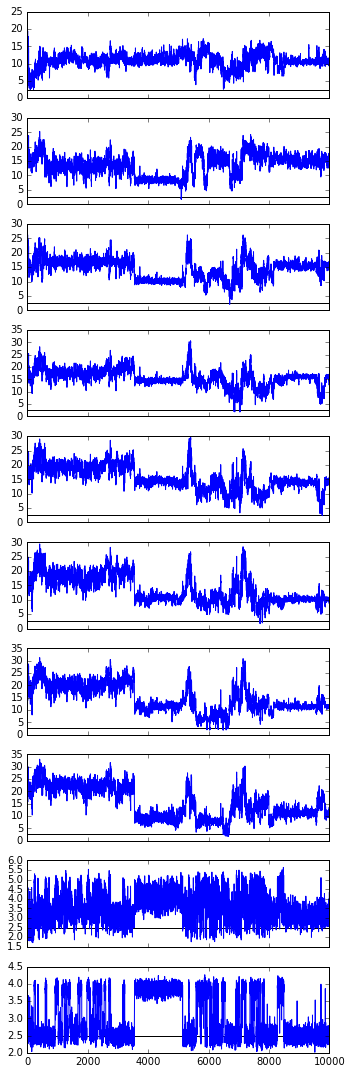

In [9]:
fig, axes = plt.subplots(nrows = 10, sharex=True, figsize=(5,15))
bh_cutoff = 2.5
for idx, ax in enumerate(axes):
    ax.plot(bh_dist.T[idx]*10)
    ax.hlines(bh_cutoff, 0, bh_dist.shape[0])
plt.tight_layout()

In [10]:
all_paths = ['../Data/fs_peptide/trajectory-{0}.xtc'.format(i+1) for i in range(28) ]
all_traj = md.join(md.load(x, top='../Data/fs_peptide/fs-peptide.pdb') for x in all_paths )

/Users/robert_arbon/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/Users/robert_arbon/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/Users/robert_arbon/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/Users/robert_arbon/anaconda/lib/python2.7/site-packages/mdtraj/formats/pdb/pdbfile.py:196: Us

In [14]:
all_bh_indices = md.baker_hubbard(all_traj, freq=0.0, exclude_water=True, periodic=True, sidechain_only=False)
all_bh_indices.shape

(771, 3)

In [17]:
import numpy as np
np.save('hbonds_0pc.npy', all_bh_indices)

In [20]:
bh_indices = md.baker_hubbard(all_traj, freq=0.01, exclude_water=True, periodic=True, sidechain_only=False)
print(bh_indices.shape)
np.save('hbonds_1pc.npy', bh_indices)

(142, 3)


In [21]:
bh_indices = md.baker_hubbard(all_traj, freq=0.1, exclude_water=True, periodic=True, sidechain_only=False)
print(bh_indices.shape)
np.save('hbonds_10pc.npy', bh_indices)

(35, 3)
